In [68]:
from py2neo import Graph
import matplotlib.pyplot as plt
from collections import defaultdict
import random
import requests
from statistics import mean

In [4]:
# Connect to the graph database
graph = Graph("bolt://localhost:7687", auth=("neo4j", "admin"))

In [39]:
# get the ratings distribution for each user
query = """
MATCH (u:User)-[r:RATES]-(m:Movie)
RETURN u.id AS userId, r.rating AS rating
"""
ratings = graph.run(query)

In [40]:
groupped = defaultdict(list)
for rating in ratings:
    groupped[rating['userId']].append(rating['rating'])


In [77]:
def plot_user(id, round_to_half=False):
    
    def get_predicted_ratings(id):
        url = f"http://127.0.0.1:5000/users/{id}/predict"
        response = requests.get(url)
        ratings = response.json()["predictedRatings"]
        # round the ratings in 0.5 steps
        if round_to_half:
            return [round(rating["rating"] * 2) / 2 for rating in ratings]
        return [rating["rating"] for rating in ratings]
    
    predicted_ratings = get_predicted_ratings(id)
    real_ratings = groupped[id]
    # make two subplots side by side
    f, (ax1, ax2) = plt.subplots(1, 2)

    ax1.hist(real_ratings)
    ax1.set_xlim(0, 5)
    ax1.set_title("Submitted of User " + str(id))

    ax2.hist(predicted_ratings)
    ax2.set_xlim(0, 5)
    ax2.set_title("Predicted for user " + str(id))

    plt.show()

In [65]:
def plot_users(limit = 10):
    users = list(groupped.keys())
    random_users = random.sample(users, limit)
    for user in random_users:
        plot_user(user)

In [66]:
len(groupped)

672

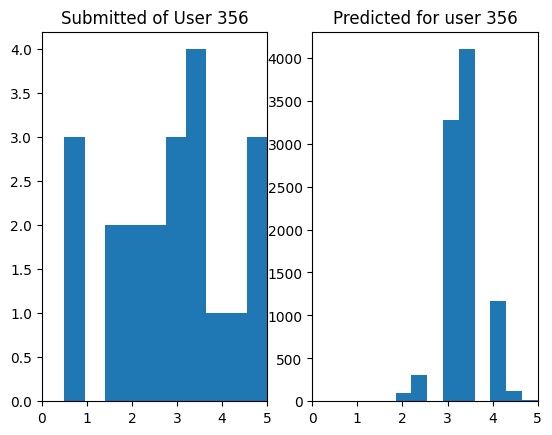

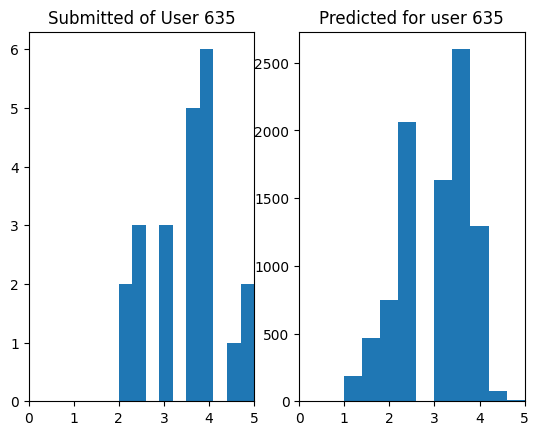

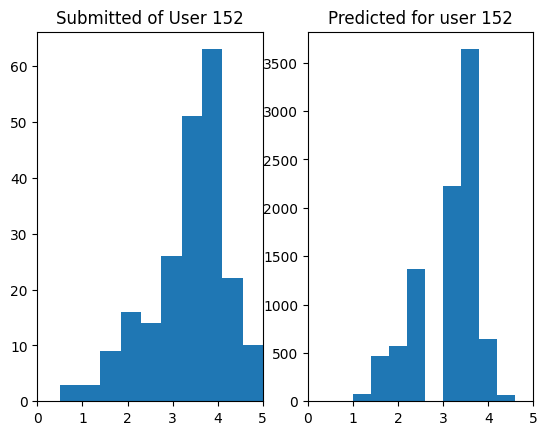

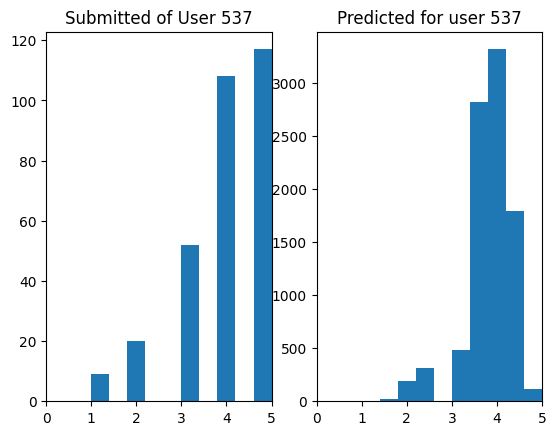

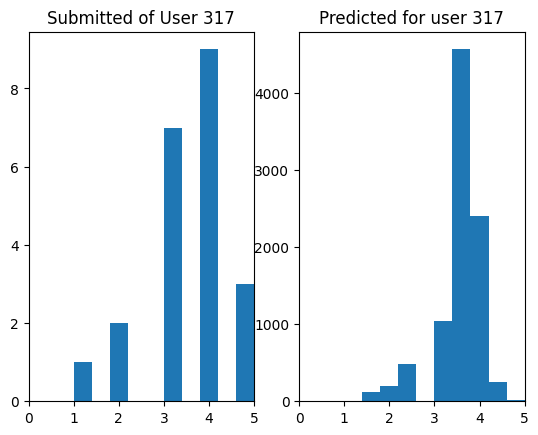

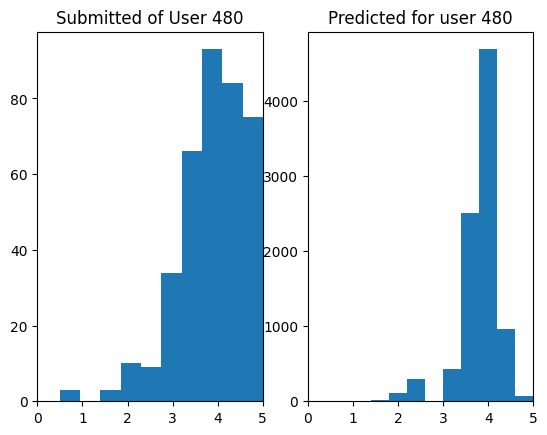

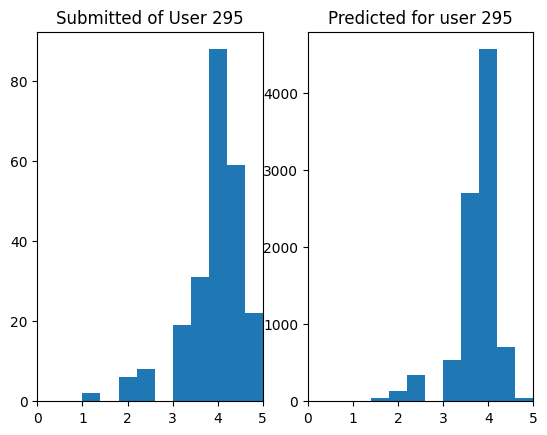

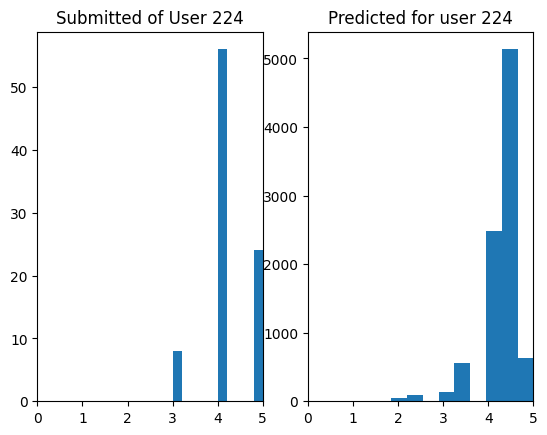

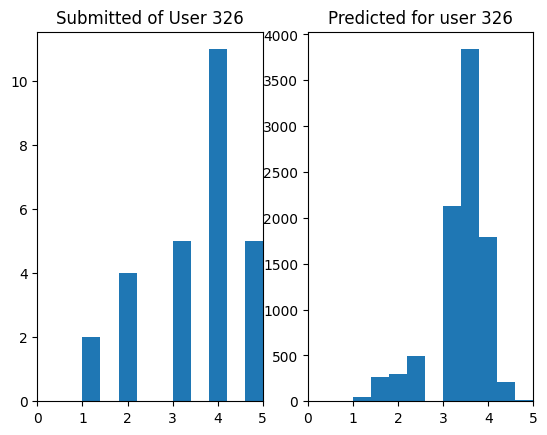

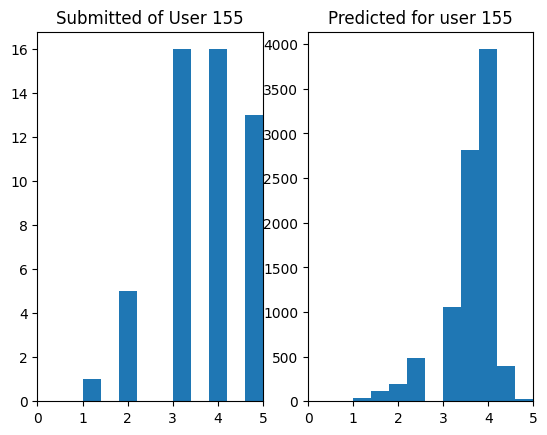

In [67]:
plot_users(10)

In [74]:
def plot_low_users(threshold=3, limit = 10):
    users = list(groupped.keys())
    low_users = [user for user in users if mean(groupped[user]) < threshold]
    print(f"Found {len(low_users)} users with an average rating of {threshold} or less")
    sample = random.sample(low_users, limit)
    for user in sample:
        plot_user(user)

Found 59 users with an average rating of 3 or less


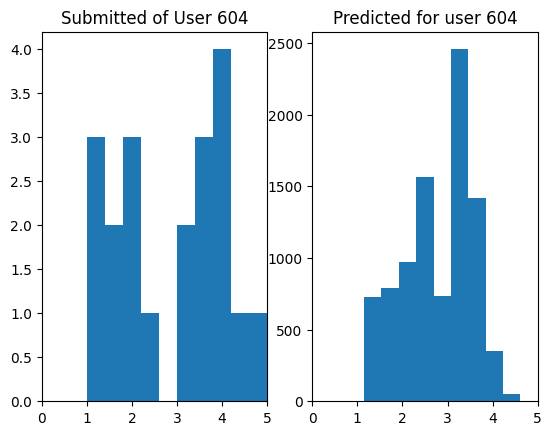

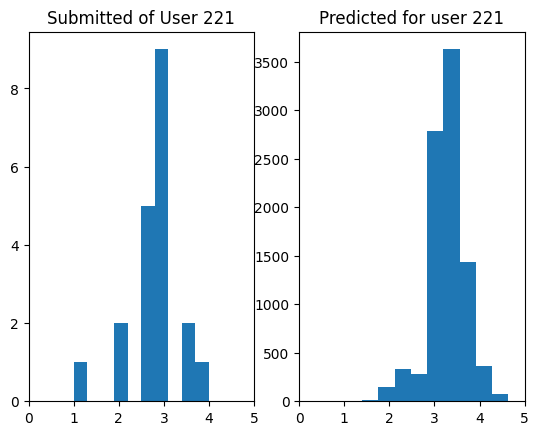

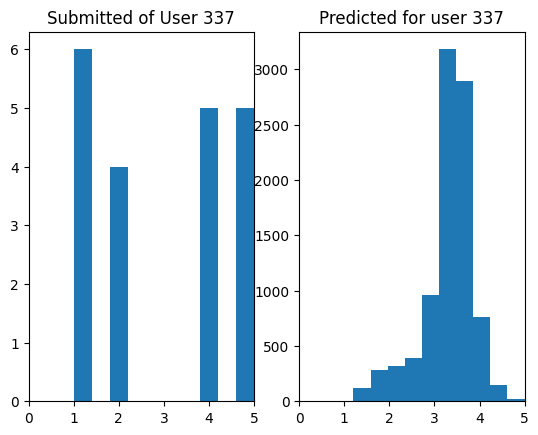

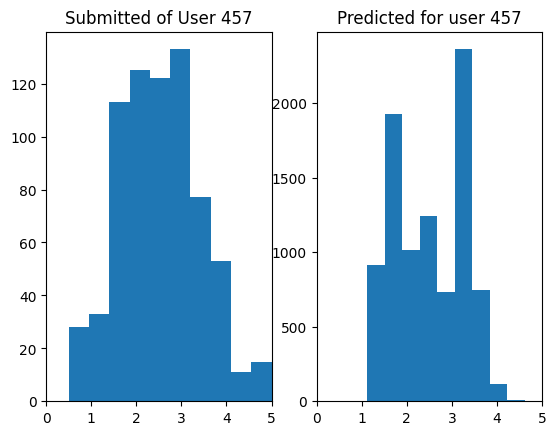

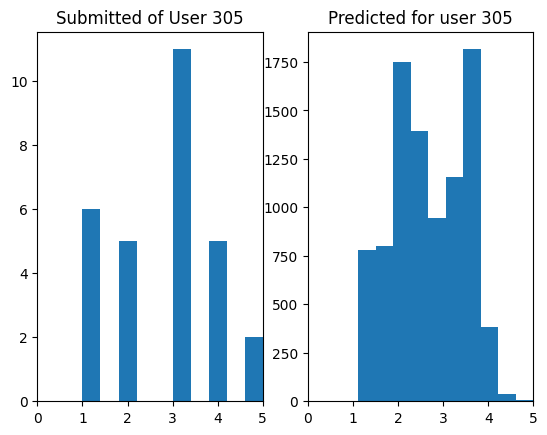

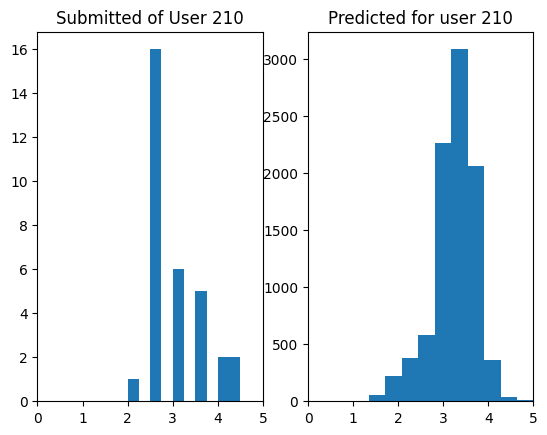

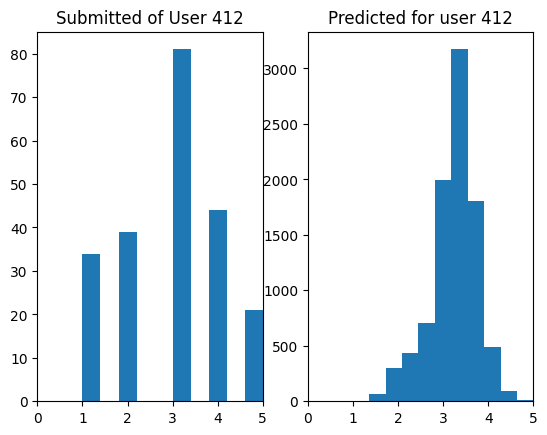

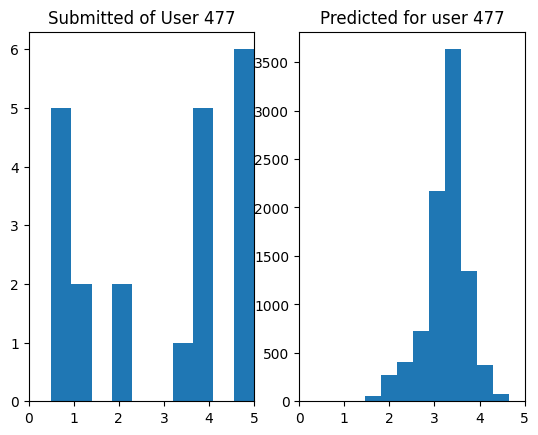

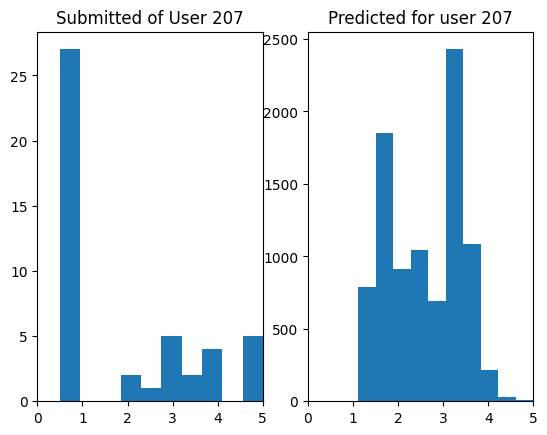

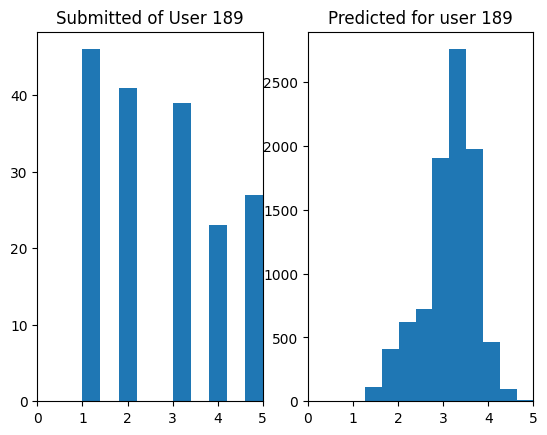

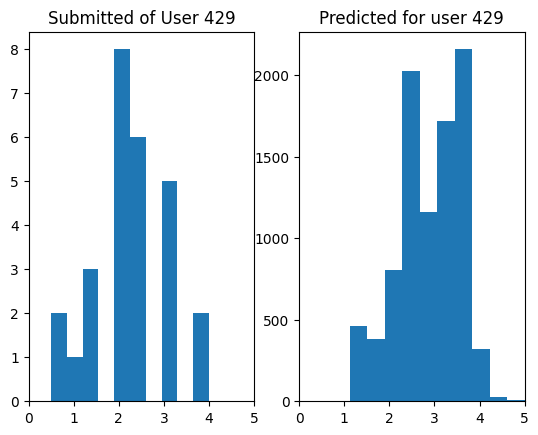

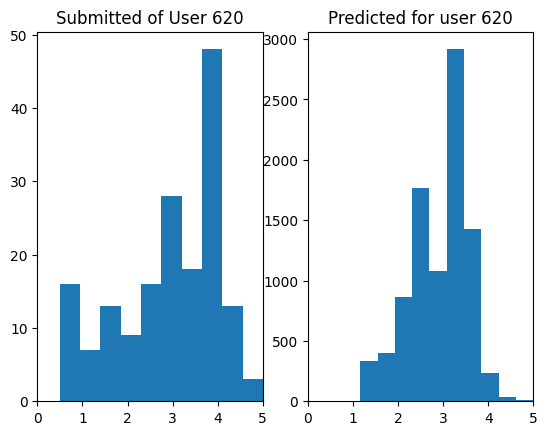

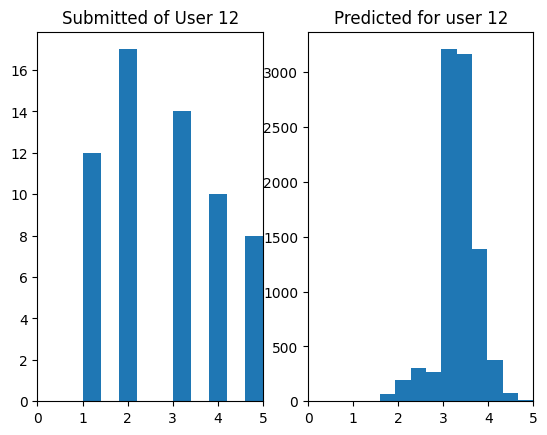

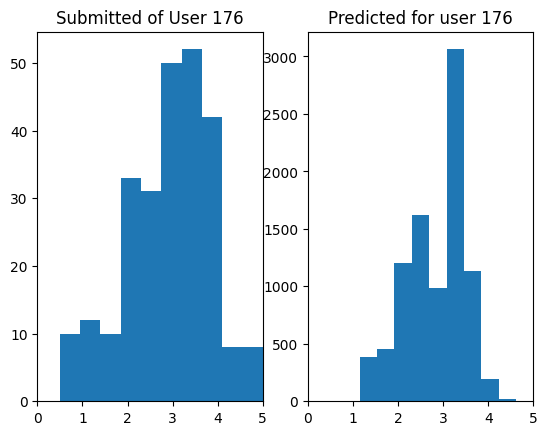

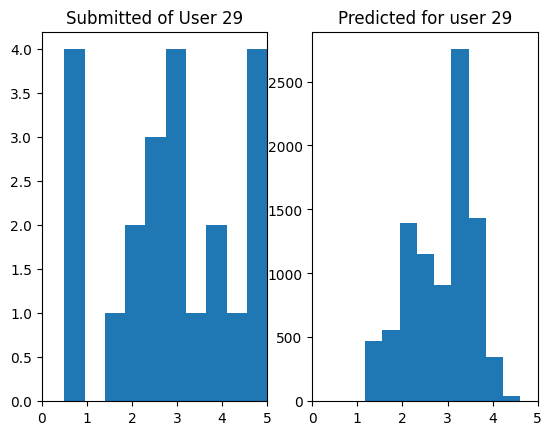

In [80]:
plot_low_users(3, 15)

In [ ]:
# a test case to find users with a distribution that tends to form two clusters

def plot_two_cluster_users(limit = 10):
    users = list(groupped.keys())
    two_cluster_users = [user for user in users if len(set(groupped[user])) == 2]
    print(f"Found {len(two_cluster_users)} users with a two cluster distribution")
    sample = random.sample(two_cluster_users, limit)
    for user in sample:
        plot_user(user)

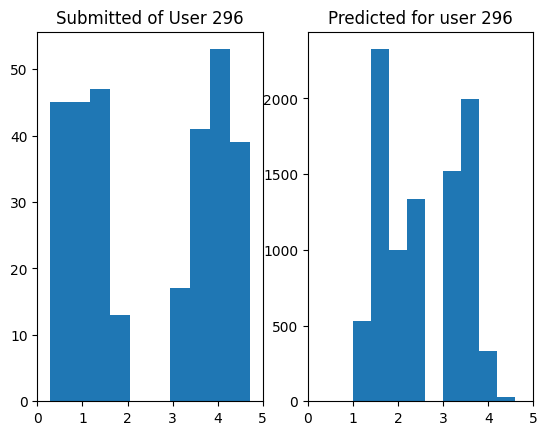

In [78]:
plot_user(296, round_to_half=True)

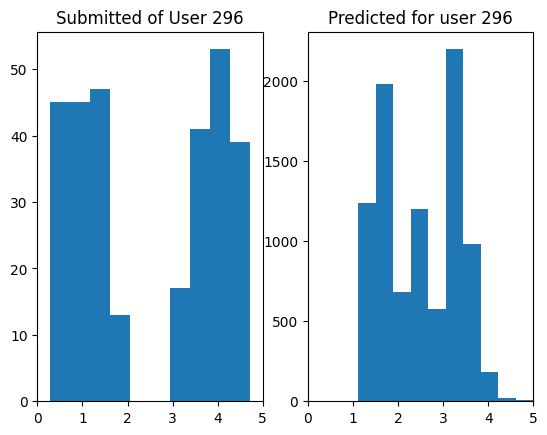

In [79]:
plot_user(296, round_to_half=False)